Moreno has assigned you the first question to answer: How do annual members and casual riders use Cyclistic bikes differently?

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

Importing datasets

In [3]:
# importing 2023 data
data_jan = pd.read_csv(r"C:\Users\truon\Desktop\Folders\Cyclistic Data\Datasets\202301-divvy-tripdata.csv")
data_feb = pd.read_csv(r"C:\Users\truon\Desktop\Folders\Cyclistic Data\Datasets\202302-divvy-tripdata.csv")
data_mar = pd.read_csv(r"C:\Users\truon\Desktop\Folders\Cyclistic Data\Datasets\202303-divvy-tripdata.csv")
data_apr = pd.read_csv(r"C:\Users\truon\Desktop\Folders\Cyclistic Data\Datasets\202304-divvy-tripdata.csv")
data_may = pd.read_csv(r"C:\Users\truon\Desktop\Folders\Cyclistic Data\Datasets\202305-divvy-tripdata.csv")
data_jun = pd.read_csv(r"C:\Users\truon\Desktop\Folders\Cyclistic Data\Datasets\202306-divvy-tripdata.csv")
data_jul = pd.read_csv(r"C:\Users\truon\Desktop\Folders\Cyclistic Data\Datasets\202307-divvy-tripdata.csv")
data_aug = pd.read_csv(r"C:\Users\truon\Desktop\Folders\Cyclistic Data\Datasets\202308-divvy-tripdata.csv")
data_sep = pd.read_csv(r"C:\Users\truon\Desktop\Folders\Cyclistic Data\Datasets\202309-divvy-tripdata.csv")
data_oct = pd.read_csv(r"C:\Users\truon\Desktop\Folders\Cyclistic Data\Datasets\202310-divvy-tripdata.csv")
data_nov = pd.read_csv(r"C:\Users\truon\Desktop\Folders\Cyclistic Data\Datasets\202311-divvy-tripdata.csv")
data_dec = pd.read_csv(r"C:\Users\truon\Desktop\Folders\Cyclistic Data\Datasets\202312-divvy-tripdata.csv")

In [4]:
#merging imported dataframes into one

dfs = [data_jan, data_feb, data_mar, data_apr, data_may, data_jun, data_jul, data_aug, data_sep, data_oct, data_nov, data_dec] #list of dataframes

df_merged = pd.concat(dfs)


In [5]:
for i in dfs:
    del i

In [6]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5719877 entries, 0 to 224072
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 610.9+ MB


In [7]:
df_merged.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [8]:
#removing null rows:
df_merged.dropna(inplace=True)

In [9]:
#checking for duplicated rows and dropping them
df_merged.duplicated().value_counts()

False    4331707
dtype: int64

In [10]:
df_merged.drop_duplicates(inplace=True)

In [11]:
#dropping unnecessary columns:
dropped_cols = ["ride_id", "start_station_name", "start_station_id", "end_station_name", "end_station_id", "start_lat", "start_lng", "end_lat", "end_lng"]
df_merged.drop(dropped_cols, axis = 1,inplace=True)

In [12]:
#started_at and ended_at column data type is wrong -> change to datetime
df_merged['started_at'] = pd.to_datetime(df_merged['started_at'])
df_merged['ended_at'] = pd.to_datetime(df_merged['ended_at'])

In [13]:
#creating a trip duration column:
df_merged['trip_duration'] = (df_merged['ended_at'] - df_merged['started_at'])
df_merged['trip_duration'] = df_merged['trip_duration'].dt.total_seconds() / 60


In [14]:
#creating a month column using the starting timestamp
df_merged['month'] = pd.DatetimeIndex(df_merged['started_at']).month 

In [15]:
#creating a season column based on the month of the trip (in this case, the company is based in the US so we would have the following mapping: Dec->Feb: Winter, Mar->May: Spring, Jun->Aug: Summer, Sep->Nov: Fall)
season_mapping = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
                  6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}

df_merged['season'] = df_merged['started_at'].dt.month.map(season_mapping)

In [16]:
#creating a column for the starting hour of the trip:
df_merged["starting_hour"] = df_merged["started_at"].dt.hour

In [36]:
import calendar
#creating a column for the weekday of the trip:
df_merged["weekday"] = df_merged['started_at'].dt.day_name()
weekday_order = list(calendar.day_name)
df_merged['weekday'] = pd.Categorical(df_merged['weekday'], categories=weekday_order, ordered=True)

In [18]:
#drop any column where there's any negative or zero value in the trip_duration column:
df_merged = df_merged[df_merged['trip_duration']>=0]
df_merged
#from 4331707 rows -> 4331663 rows


,rideable_type,started_at,ended_at,member_casual,trip_duration,month,season,starting_hour,weekday
0,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,member,10.850000,1,Winter,20,Saturday
1,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,member,8.483333,1,Winter,15,Tuesday
2,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,casual,13.233333,1,Winter,7,Monday
3,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,member,8.766667,1,Winter,10,Sunday
4,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,member,15.316667,1,Winter,13,Thursday
...,...,...,...,...,...,...,...,...,...
224068,electric_bike,2023-12-07 13:15:24,2023-12-07 13:17:37,casual,2.216667,12,Winter,13,Thursday
224069,classic_bike,2023-12-08 18:42:21,2023-12-08 18:45:56,casual,3.583333,12,Winter,18,Friday
224070,classic_bike,2023-12-05 14:09:11,2023-12-05 14:13:01,member,3.833333,12,Winter,14,Tuesday
224071,electric_bike,2023-12-02 21:36:07,2023-12-02 21:53:45,casual,17.633333,12,Winter,21,Saturday


In [19]:
df_merged

,rideable_type,started_at,ended_at,member_casual,trip_duration,month,season,starting_hour,weekday
0,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,member,10.850000,1,Winter,20,Saturday
1,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,member,8.483333,1,Winter,15,Tuesday
2,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,casual,13.233333,1,Winter,7,Monday
3,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,member,8.766667,1,Winter,10,Sunday
4,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,member,15.316667,1,Winter,13,Thursday
...,...,...,...,...,...,...,...,...,...
224068,electric_bike,2023-12-07 13:15:24,2023-12-07 13:17:37,casual,2.216667,12,Winter,13,Thursday
224069,classic_bike,2023-12-08 18:42:21,2023-12-08 18:45:56,casual,3.583333,12,Winter,18,Friday
224070,classic_bike,2023-12-05 14:09:11,2023-12-05 14:13:01,member,3.833333,12,Winter,14,Tuesday
224071,electric_bike,2023-12-02 21:36:07,2023-12-02 21:53:45,casual,17.633333,12,Winter,21,Saturday


Analyze

In [20]:
#importing pyplot:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter

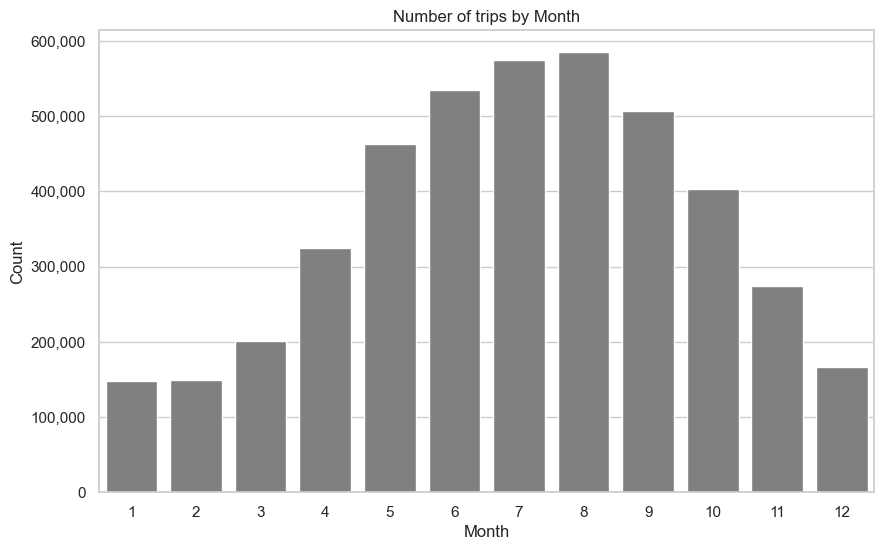

In [21]:
#visualizing the numbers of trip based on months:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Use the countplot function
sns.countplot(data=df_merged, x='month', color = 'grey')

# Apply comma formatting to y-axis labels
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of trips by Month')

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

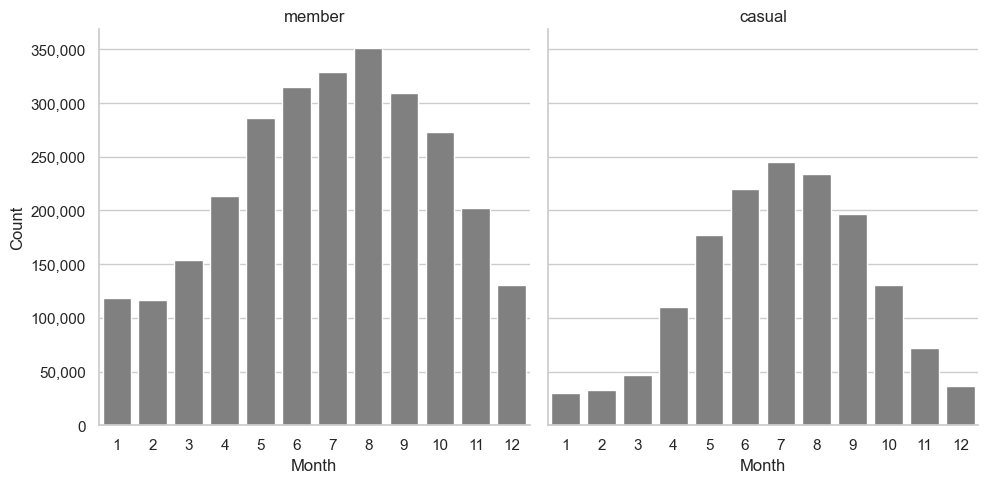

In [44]:
#further analysis of the trips count for each member types each month

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Use the countplot function

g = sns.catplot(data=df_merged, x='month', kind='count', color= "grey", col = 'member_casual')

# Apply comma formatting to y-axis labels
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add labels and title
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Month', 'Count')
g.fig.suptitle('Number of trips by months for each member type')
# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

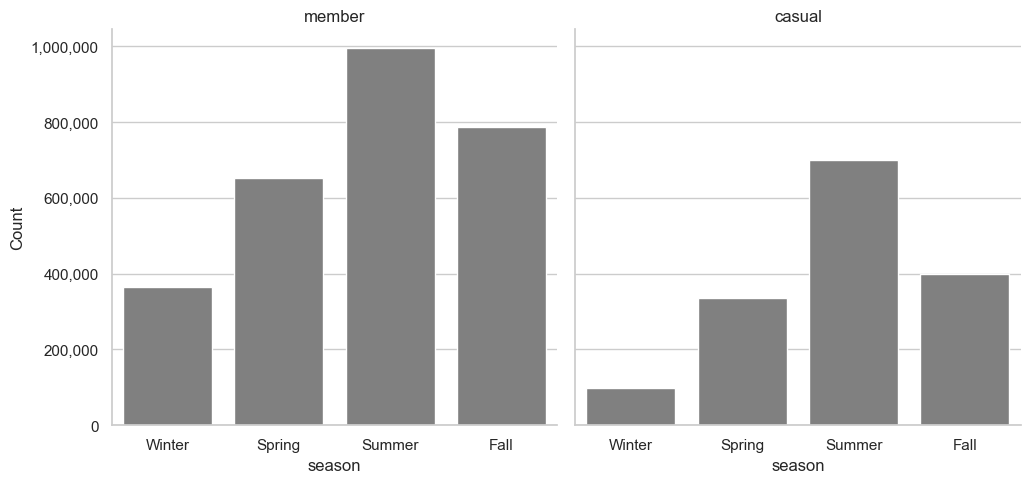

In [45]:
#further analysis of the trips count for each member types each season
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Use the countplot function

g = sns.catplot(data=df_merged, x='season', kind='count', color= "grey", col = 'member_casual')

# Apply comma formatting to y-axis labels
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add labels and title
g.set_titles(col_template="{col_name}")
g.set_axis_labels('season', 'Count')
g.fig.suptitle('Number of trips by season for each member type')
# Show the plot
plt.show()

We can see that the highs of bike rents are in the summer and early fall/spring months (from May to September). The numbers for colder months are significantly lower. This is still correct when we break down the numbers into each member types, both of the types follow the same distribution.

<Figure size 2000x2000 with 0 Axes>

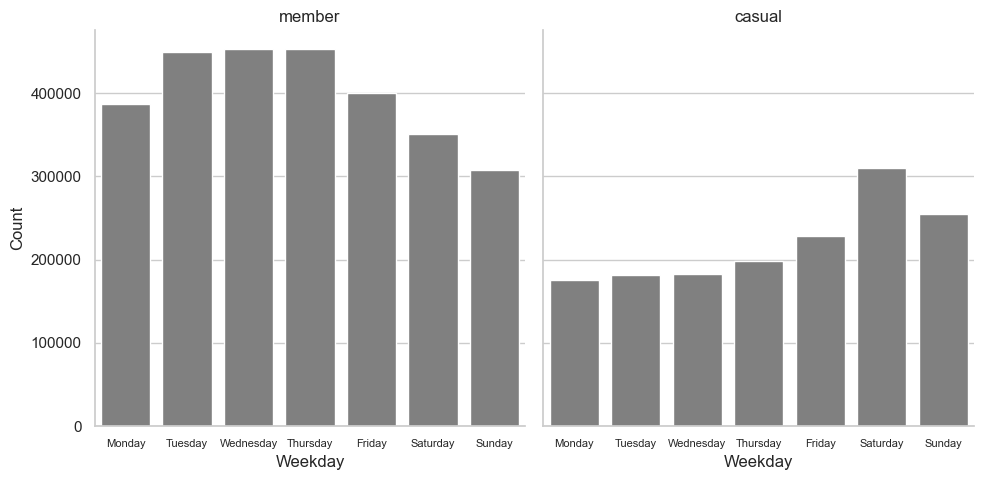

In [41]:
#visualize the number of trips each day of the week for each member types

sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))

g = sns.catplot(data=df_merged, x='weekday', kind='count', color= "grey", col = 'member_casual')

g.set_axis_labels('Weekday', 'Count')
g.set_titles(col_template="{col_name}")
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
g.fig.suptitle('Number of trips by weekdays for each member type')
# reduce the font size of the xticks
for ax in g.axes.flatten():
    ax.tick_params(axis='x', labelsize=8)

# Show the plot
plt.show()

Members rent bikes for their trips more during the weekdays than in the weekends. Conversely, the casual renters go on trips more on weekends.

<Figure size 1200x800 with 0 Axes>

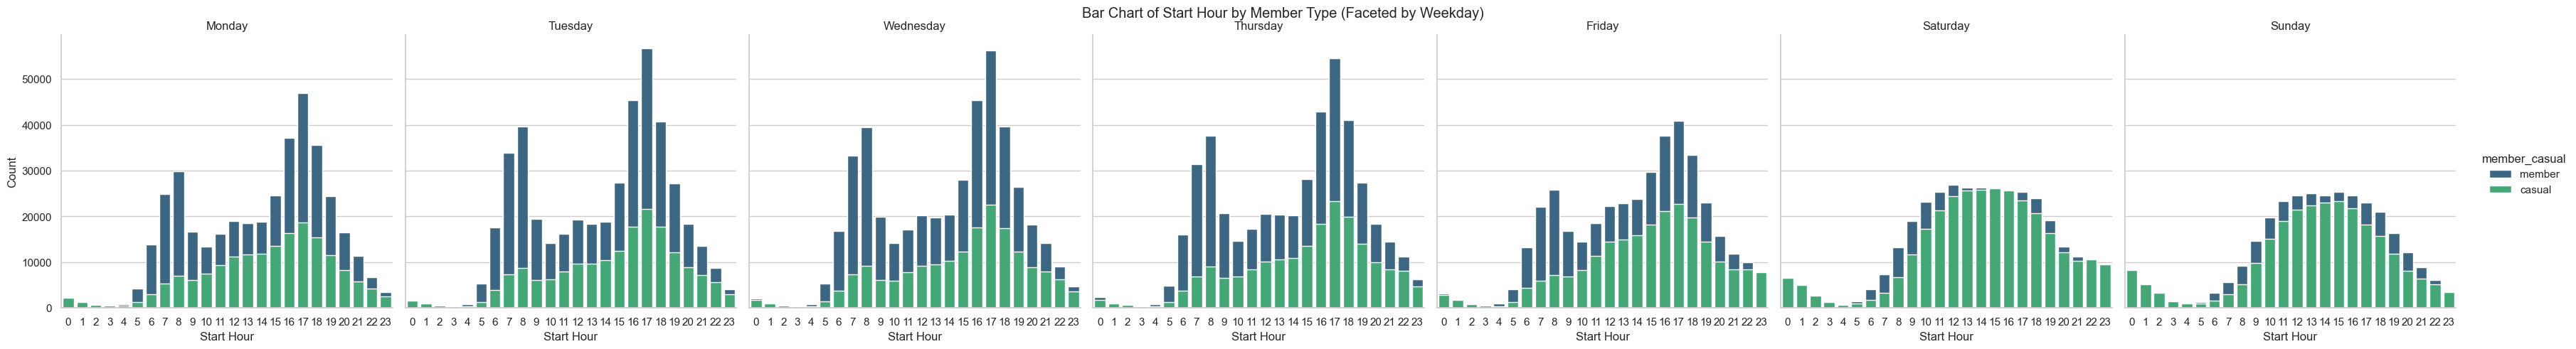

In [47]:

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
g = sns.catplot(data=df_merged, x='starting_hour', hue='member_casual', kind='count', palette='Set1', col='weekday', dodge = False)

# Add labels and title
g.set_axis_labels('Start Hour', 'Count')
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)  # Adjust the top of the plot for the title
g.fig.suptitle('Number of trips by starting hours for each member types and weekdays')

# Show the plot
plt.show()

As mentioned above, the annual members rent more on weekdays and the casual renters go more on weekend. Both the annual members and the casual renters rent mostly in the afternoon.
However, the annual members also start their trips in the early morning (before 8AM) in the weekdays, while the casual renters only go in the afternoon for everyday of the week. Additionally, the casual renters also rent late in the evening and after midnight, unlike the annual members.

In [23]:
#bicycle types for rent:
df_merged['rideable_type'].unique()
#-> 3 types of bicyles

array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object)

In [24]:
df_merged['rideable_type'].value_counts(normalize=False)

classic_bike     2690707
electric_bike    1564810
docked_bike        76124
Name: rideable_type, dtype: int64

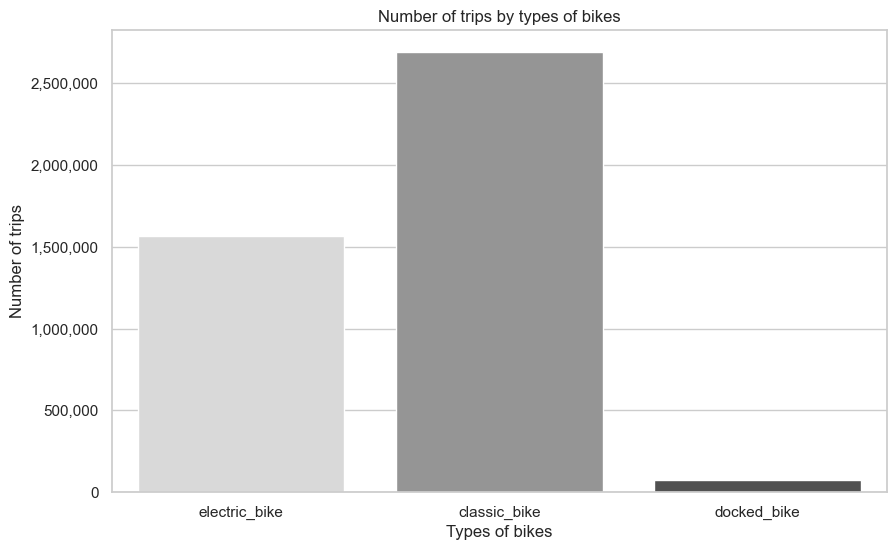

In [25]:
#visualize the number of bicycle trips taken based on types:
#create a bar chart using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

#use the countplot function
sns.countplot(data=df_merged, x='rideable_type', palette='Greys')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
#adding labels and titles
plt.xlabel('Types of bikes')
plt.ylabel('Number of trips')
plt.title('Number of trips by types of bikes')
# Show the plot
plt.show()

As we can see from the bar chart, most of the trips taken were with classic bikes at 2,7 million trips, followed by electric bikes with over 1.5 million and docked bikes trips were the minority at 0.7 million.

In [26]:
#member classes:
pd.concat([df_merged['member_casual'].value_counts(normalize=False), df_merged['member_casual'].value_counts(normalize=True)*100], axis = 1, keys = ('count', 'percentage'))
# -> 2 types of member classes, 64.6% of the trips taken a by members and the rest are by casual customers.

,count,percentage
member,2799920,64.638782
casual,1531721,35.361218


<Figure size 1000x600 with 0 Axes>

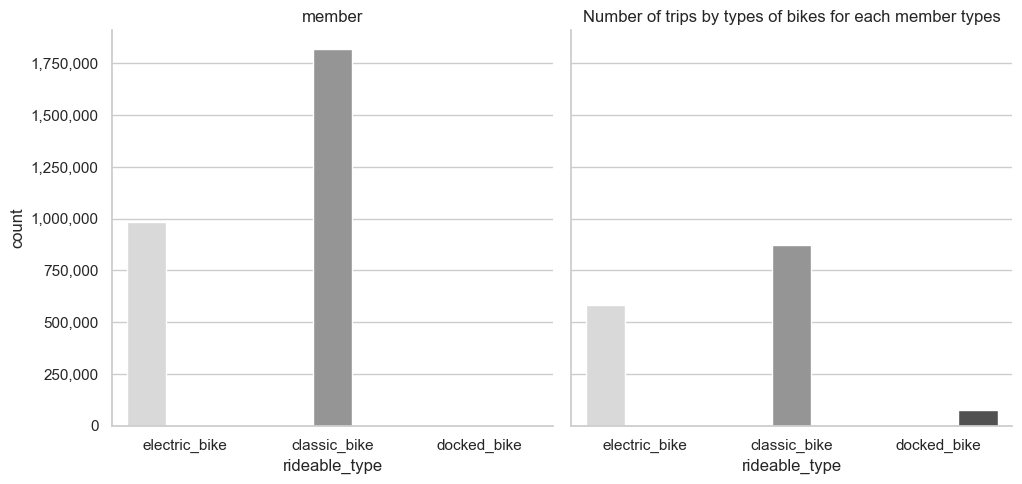

In [27]:
#visualize number of trips for each member types based on the bike types:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

#use the barplot function
g = sns.catplot(data=df_merged, x='rideable_type', kind='count', hue='rideable_type', palette='Greys', col='member_casual')
g.set_titles(col_template="{col_name}")
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
g.fig.suptitle('Number of trips by bike types for each member type', y=1.02)
plt.show()


In [28]:
df_merged.groupby(['member_casual'])['rideable_type'].value_counts()

member_casual  rideable_type
casual         classic_bike      873005
               electric_bike     582592
               docked_bike        76124
member         classic_bike     1817702
               electric_bike     982218
Name: rideable_type, dtype: int64

Both types of customers prefers classic bikes to electric ones. Only casual members take trips with docked bikes.

In [29]:
df_merged['trip_duration'].sort_values(ascending=False)

12699     12136.300000
433992    11152.266667
274283     6891.216667
71355      5379.000000
431775     4903.116667
              ...     
302624        0.000000
32731         0.000000
32743         0.000000
117063        0.000000
126751        0.000000
Name: trip_duration, Length: 4331641, dtype: float64

In [50]:
df_merged.groupby(['member_casual'])['trip_duration'].max()

member_casual
casual    12136.300000
member     1497.866667
Name: trip_duration, dtype: float64

<Figure size 1500x3000 with 0 Axes>

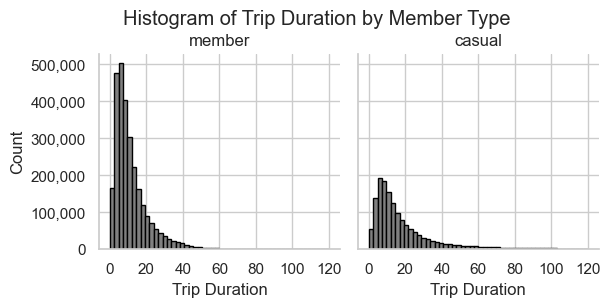

In [30]:
from matplotlib.ticker import MultipleLocator
#the trips with extremely long durations are the outlier, we will only take short trips into consideration (under 2 hours):
filtered_trips = df_merged[df_merged['trip_duration']<120]

sns.set(style="whitegrid")
plt.figure(figsize=(15, 30))

g =  sns.FacetGrid(filtered_trips, col = 'member_casual')
g.map(plt.hist, 'trip_duration', bins = 50, color = 'grey', edgecolor = 'black')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().xaxis.set_major_locator(MultipleLocator(20))


g.set_axis_labels('Trip Duration', 'Count')
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Number of trips by duration for each member type', y=1.02)

plt.show()

In [48]:
df_merged.groupby(['member_casual'])['trip_duration'].mean()

member_casual
casual    22.937337
member    12.131253
Name: trip_duration, dtype: float64

Most of the trips last under 60 minutes, with the majority of them under 20 minutes, specifically for both member types. In the case of casual trips, some last over one hour.

In conclusion, the difference between the use of Cyclistic bikes of annual members and casual riders are the following:
- Most trips are made by annual members, the number for casual riders is much lower.
- Annual members take more early morning trips during the week, while casual riders prefer to go in the afternoon and weekend.
- Only casual riders use docked bikes. Classic bikes are the most preferred for both casual riders and annual members. However, the difference between the popularity of classic and electric bikes for annual members are much more significant than that for casual riders.
- Annual members take trips that last shorter than 1 hour, casual riders take longer trips.

In [52]:
#df_merged.to_csv(r'C:\Users\truon\Desktop\Folders\Cyclistic Data\merged_dataset.ipynb', index=False)


In [31]:
df_merged.head(n=1)


,rideable_type,started_at,ended_at,member_casual,trip_duration,month,season,starting_hour,weekday
0,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,member,10.85,1,Winter,20,Saturday
